# MAC0209 - Modelagem e Simulação

Pynamical: Demo of logistic map and bifurcation diagrams

Author: Geoff Boeing

Adapted and modified by: R. Hirata Jr., Artur André, Roberto. M. Cesar Jr to be used in MAC0209

Leia o artigo completo aqui:
http://geoffboeing.com/2015/03/chaos-theory-logistic-map/

In [1]:
!python -m pip install pynamical
!python -m pip uninstall matplotlib -y
!python -m pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.21.6 which is incompatible.
Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3

In [2]:
!python -m pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pynamical import logistic_map, simulate, bifurcation_plot
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")


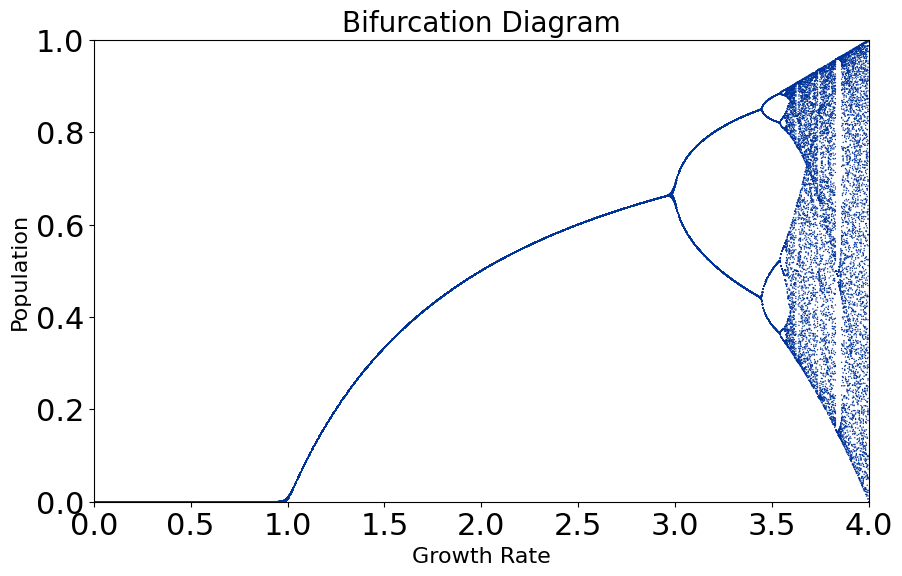

In [4]:
pops = simulate(model=logistic_map, num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops)

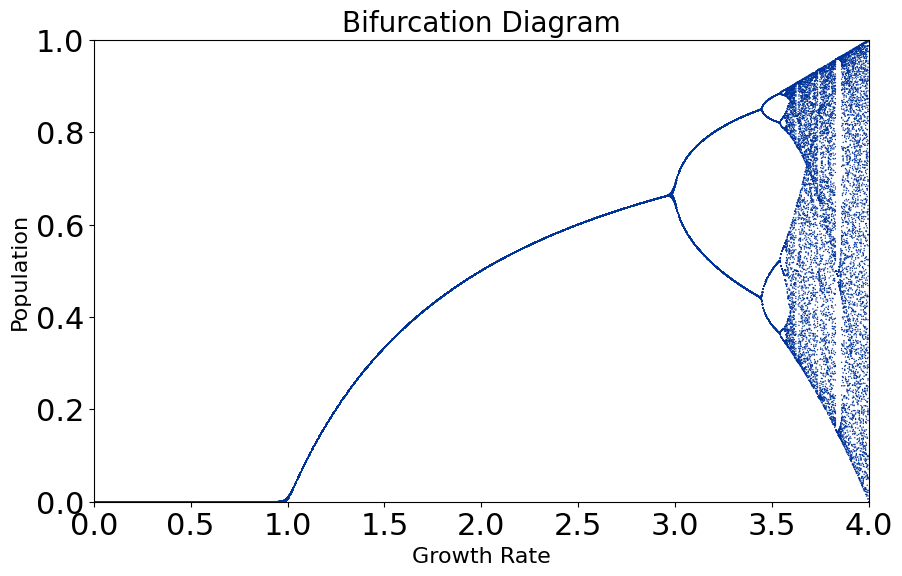

In [5]:
fig = bifurcation_plot(pops)
#plt.axvline(x=3.1, ymin=0, ymax=1)

### Aqui vamos analizar a primeira geração ($x_1$)onde a população inicial, $x_0 \in [0,1]$ varia entre 0 e 1; a taxa de crecimento $r = 0.5$ é fixa.

Text(0.5, 0, 'Initial population, x₀')

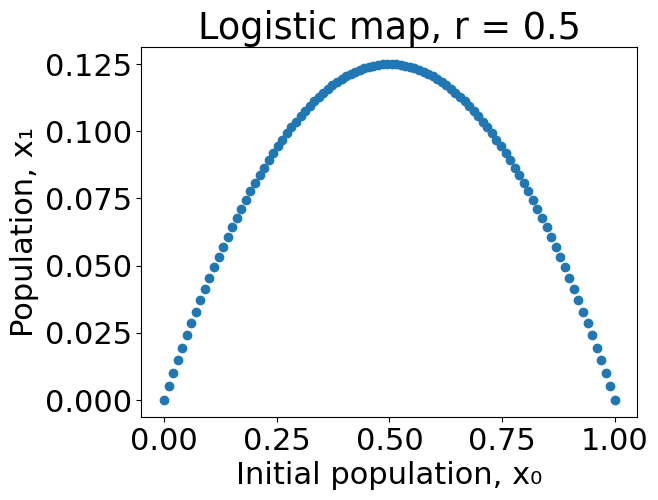

In [6]:
x = np.linspace(0,1, 100)
plt.scatter(x, logistic_map(x, 0.5))
plt.title('Logistic map, r = 0.5')
plt.ylabel('Population, x1'.translate(SUB))
plt.xlabel('Initial population, x0'.translate(SUB))

### Aqui vamos analizar a primeira geração onde a população inicial, $x_0 = 0.5$, e a taxa de crescimento $r \in [0,4]$ varia entre 0 e 4.

Text(0, 0.5, 'Population, x1')

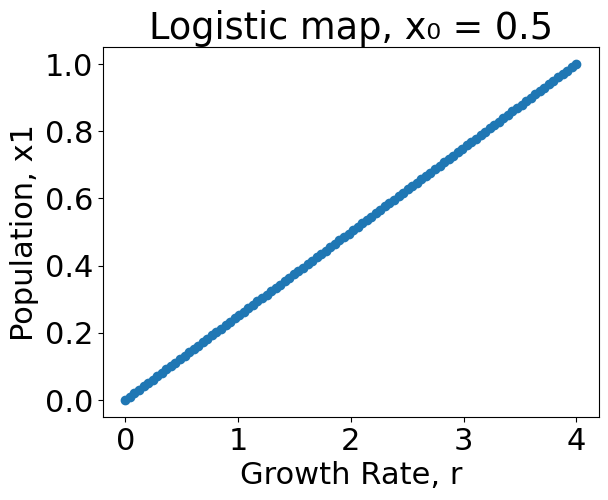

In [7]:
r = np.linspace(0,4, 100)
plt.scatter(r, logistic_map(.5, r))
plt.title('Logistic map, x0'.translate(SUB)+' = 0.5')
plt.xlabel('Growth Rate, r')
plt.ylabel('Population, x1')

### Aqui podemos ver que alguns pares de população inicial e taxas de crescimento atingem pontos de estabilidade após um certo número de gerações. Aqui rodamos cada caso por 100 gerações, isso é, de $x_0$ até $x_{99}$.

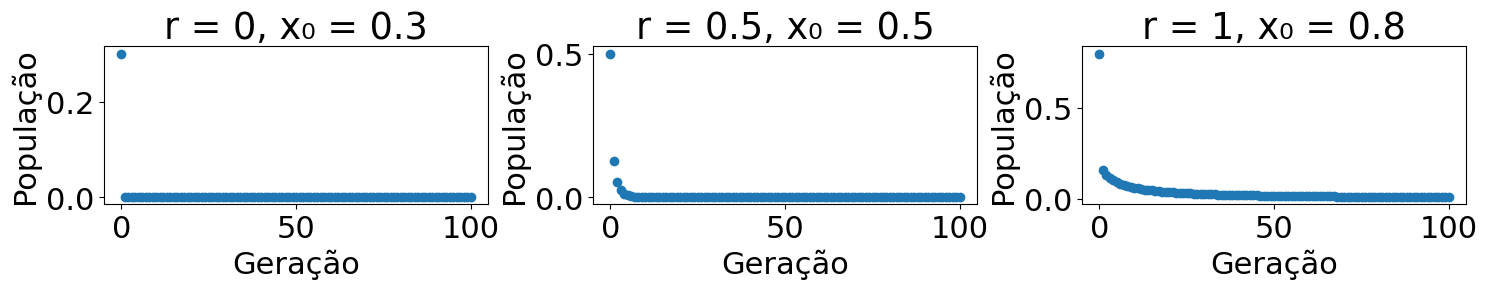

In [8]:
xini0 = 0.3
xini1 = 0.5
xini2 = 0.8
r0 = 0
r1 = 0.5
r2 = 1
s0 = [xini0]
s1 = [xini1]
s2 = [xini2]
for _ in range(100):
  s0.append(logistic_map(s0[-1], r0))
  s1.append(logistic_map(s1[-1], r1))
  s2.append(logistic_map(s2[-1], r2))
fig, axs = plt.subplots(1, 3, figsize=(15,3))
axs[0].scatter(list(range(len(s0))), s0)
axs[0].set_title(f"r = 0, "+"x0".translate(SUB)+f" = {xini0}")

axs[1].scatter(list(range(len(s1))), s1)
axs[1].set_title(f"r = 0.5, "+"x0".translate(SUB)+f" = {xini1}")

axs[2].scatter(list(range(len(s2))), s2)
axs[2].set_title(f"r = 1, "+"x0".translate(SUB)+f" = {xini2}")
plt.tight_layout()

for ax in axs.flat:
    ax.set(xlabel='Geração')
    ax.set(ylabel='População')
    #ax[0].xaxis.set_xlabel('Geração')


### No caso abaixo podemos ver que $x$ convege para dois valores, podemos ver que isso coincide com oque observamos no "bifurcation map" onde para o valor de $r = 3.429$ esperamos que $x$ (a população) convirja para dois valores.

Últimos valores de população:
x[996] = 0.8468095286369087
x[997] = 0.4448206842531463
x[998] = 0.8468095286369081
x[999] = 0.44482068425314786


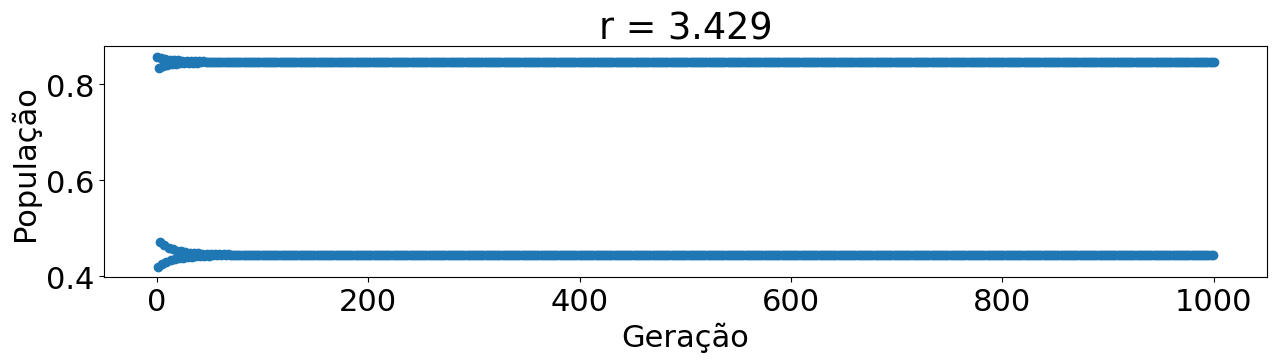

In [9]:
xini = 0.5
r = 3.429
x = [logistic_map(xini, r)]
for _ in range(1000):
    x.append(logistic_map(x[-1], r))
plt.figure(figsize=(15,3))
plt.scatter(list(range(len(x))), x)
plt.title("r = 3.429");
plt.xlabel('Geração')
plt.ylabel('População')
print(f"Últimos valores de população:")
print(f"x[996] = {x[996]}")
print(f"x[997] = {x[997]}")
print(f"x[998] = {x[998]}")
print(f"x[999] = {x[999]}")

Últimos valores de população:
x[9996] = 0.8468095286369087
x[9997] = 0.4448206842531463
x[9998] = 0.8468095286369081
x[9999] = 0.44482068425314786


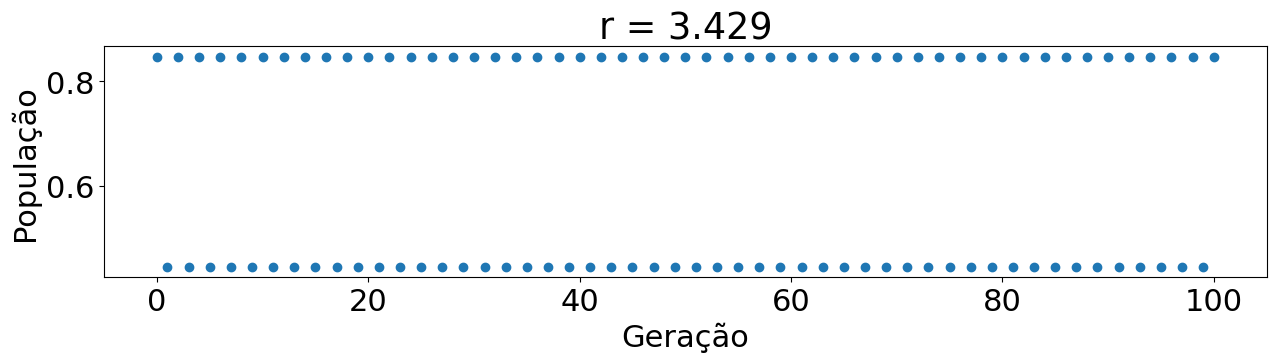

In [10]:
xini = 0.5
r = 3.429
x = [logistic_map(xini, r)]
for _ in range(10000):
    x.append(logistic_map(x[-1], r))

plt.figure(figsize=(15,3))
plt.scatter(list(range(len(x[9900:]))), x[9900:])
plt.title("r = 3.429");
plt.xlabel('Geração')
plt.ylabel('População')
print(f"Últimos valores de população:")
print(f"x[9996] = {x[9996]}")
print(f"x[9997] = {x[9997]}")
print(f"x[9998] = {x[9998]}")
print(f"x[9999] = {x[9999]}")

### Novamente de acordo com o "bifurcation map" para um $r = 3.8$ observamos que não é claro se $x$ converge para algum conjunto de valores ou não.

Text(0, 0.5, 'População (x)')

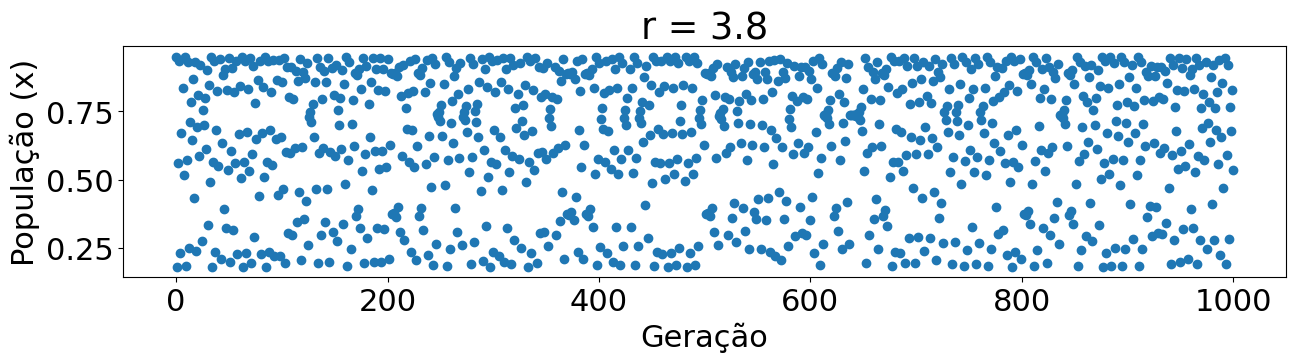

In [11]:
xini = 0.5
r = 3.8
s = [logistic_map(xini, r)]
for _ in range(1000):
    s.append(logistic_map(s[-1], r))
plt.figure(figsize=(15,3))
plt.scatter(list(range(len(s))), s)
plt.ylabel('População')
plt.title("r = 3.8");
plt.xlabel('Geração')
plt.ylabel('População (x)')

# Exercícios

Consulte a descrição dos exercícios nos slides da aula sobre Caos.


## Mapa logístico

1. Gere um gráfico mostrando a evolução de um par de valores para população inicial e taxa de crescimento para 20 gerações que seja similar ao gráfico da figura a) no quadro branco.
    1. Gere um diagrama de bifurcação para o mapa logístico
    2. Gere um gráfico de cobweb (figura c) no quadro branco) para o mapa logístico
    3. Dica: Consulte a página do [pynamical](https://github.com/gboeing/pynamical)
2. Agora usando o matplotlib.pyplot.scatter gere o diagrama de bifurcação apenas para um subconjunto de gerações de $x_{min}$ até $x_{max}$ depois convergência ao ponto fixo,	eg. $x_{9000}$ até $x_{10000}$. Por exemplo, para $r = 3.429$ após 9996 iterações notamos que $x_n$ onde $n \in [9996, ...]$, basicamente assume os valores $0.8468095286369081$ e $0.44482068425314786$, ou seja, para este $r$ o mapa de bifurcação teria 2 pontos no eixo vertical.

